In [1]:
import pandas as pd

# Load datasets
eth_df = pd.read_csv('ETH-USD.csv')
btc_df = pd.read_csv('BTC-USD.csv')

eth_df.head(), btc_df.head()


(         Date        Open         High         Low       Close   Adj Close  \
 0  2018-01-01  755.757019   782.530029  742.004028  772.640991  772.640991   
 1  2018-01-02  772.346008   914.830017  772.346008  884.443970  884.443970   
 2  2018-01-03  886.000000   974.471008  868.450989  962.719971  962.719971   
 3  2018-01-04  961.713013  1045.079956  946.085999  980.921997  980.921997   
 4  2018-01-05  975.750000  1075.390015  956.325012  997.719971  997.719971   
 
        Volume  
 0  2595760128  
 1  5783349760  
 2  5093159936  
 3  6502859776  
 4  6683149824  ,
          Date          Open          High           Low         Close  \
 0  2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195   
 1  2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609   
 2  2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000   
 3  2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195   
 4  2018-01-05  15477.200195  17705.199219  15202.7

In [2]:
# Structure of the datasets
eth_shape = eth_df.shape
btc_shape = btc_df.shape

# Check for missing values
eth_missing = eth_df.isnull().sum()
btc_missing = btc_df.isnull().sum()

# Summary statistics
eth_summary = eth_df.describe()
btc_summary = btc_df.describe()

eth_shape, btc_shape, eth_missing, btc_missing, eth_summary, btc_summary


((1825, 7),
 (1826, 7),
 Date         0
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 dtype: int64,
 Date         0
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 dtype: int64,
               Open         High          Low        Close    Adj Close  \
 count  1825.000000  1825.000000  1825.000000  1825.000000  1825.000000   
 mean   1147.212504  1183.745189  1105.366257  1147.226387  1147.226387   
 std    1201.113472  1237.960556  1158.579939  1200.592248  1200.592248   
 min      84.279694    85.342743    82.829887    84.308296    84.308296   
 25%     208.885437   213.731949   203.522995   208.863434   208.863434   
 50%     519.023010   531.702026   498.648010   518.801147   518.801147   
 75%    1802.543823  1840.058838  1733.639893  1803.913330  1803.913330   
 max    4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   
 
              Volume  
 count  1.825000e+03  

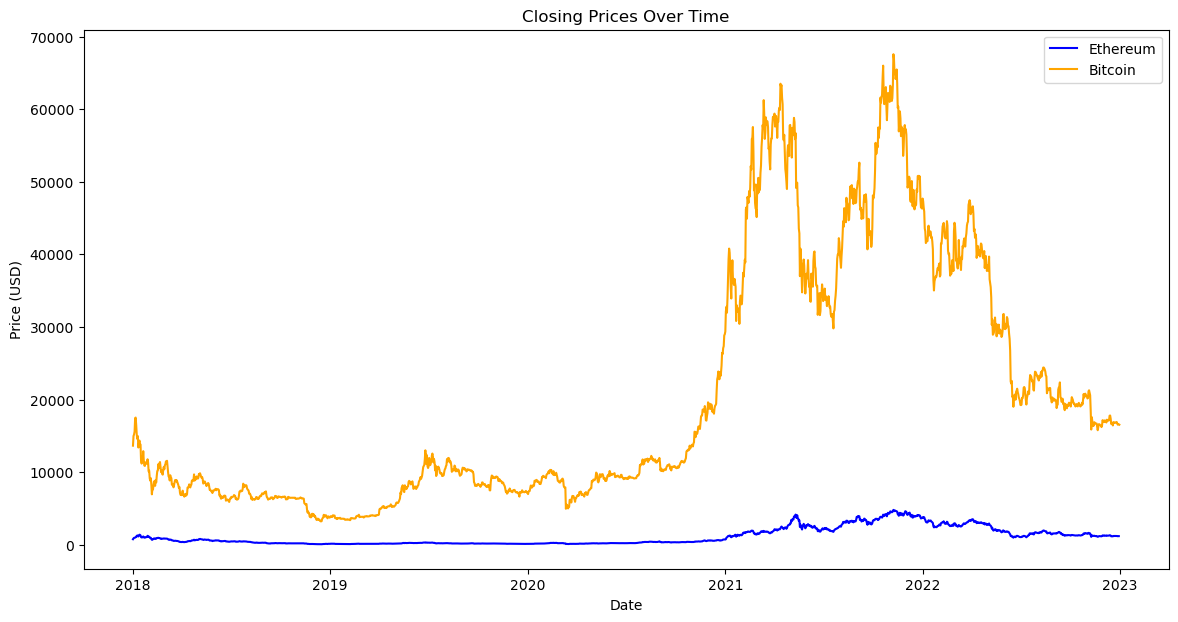

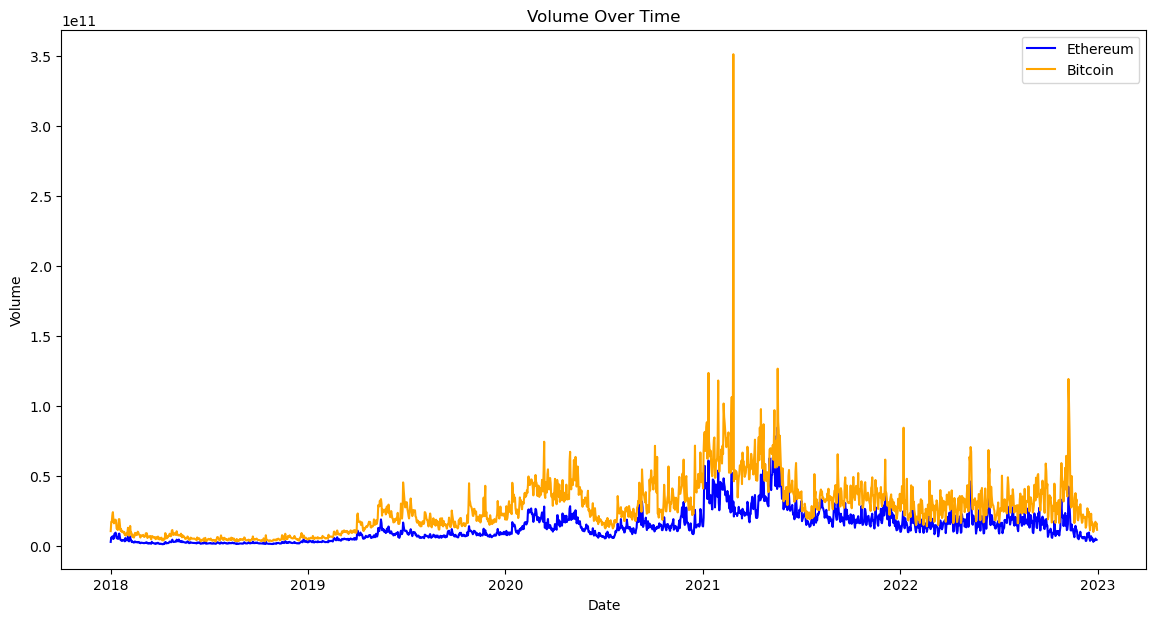

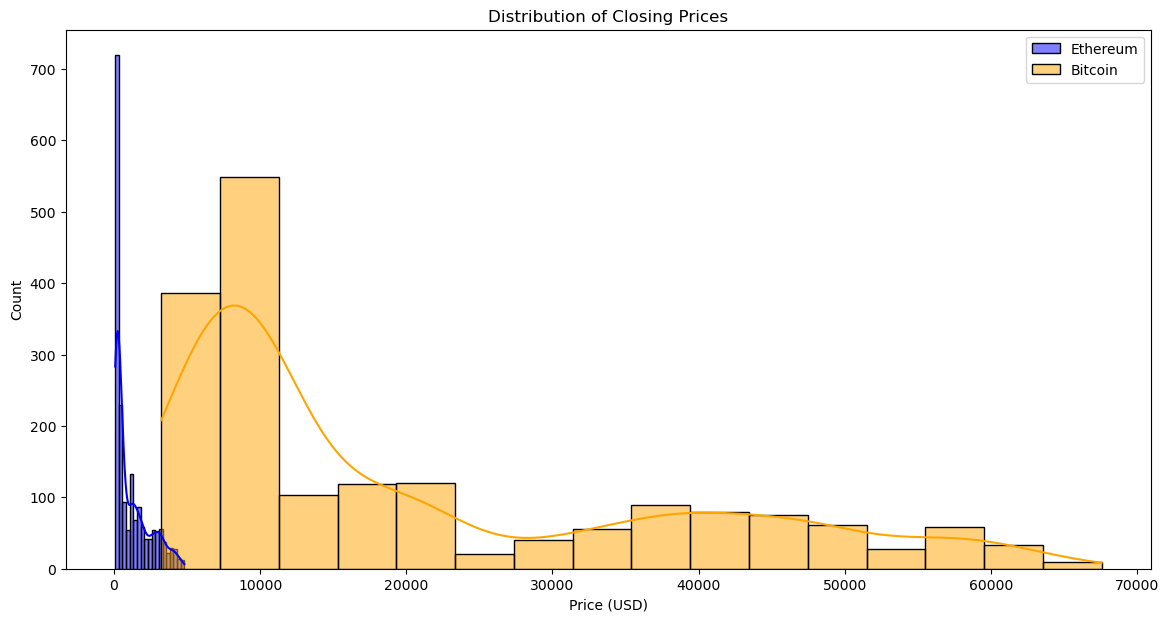

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' column to datetime
eth_df['Date'] = pd.to_datetime(eth_df['Date'])
btc_df['Date'] = pd.to_datetime(btc_df['Date'])

# Set 'Date' column as index
eth_df.set_index('Date', inplace=True)
btc_df.set_index('Date', inplace=True)

# Plot closing prices over time
plt.figure(figsize=(14,7))
plt.plot(eth_df['Close'], label='Ethereum', color='blue')
plt.plot(btc_df['Close'], label='Bitcoin', color='orange')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='best')
plt.show()

# Plot volume over time
plt.figure(figsize=(14,7))
plt.plot(eth_df['Volume'], label='Ethereum', color='blue')
plt.plot(btc_df['Volume'], label='Bitcoin', color='orange')
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='best')
plt.show()

# Plot distributions of closing prices
plt.figure(figsize=(14,7))
sns.histplot(eth_df['Close'], kde=True, color='blue', label='Ethereum')
sns.histplot(btc_df['Close'], kde=True, color='orange', label='Bitcoin')
plt.title('Distribution of Closing Prices')
plt.xlabel('Price (USD)')
plt.legend(loc='best')
plt.show()


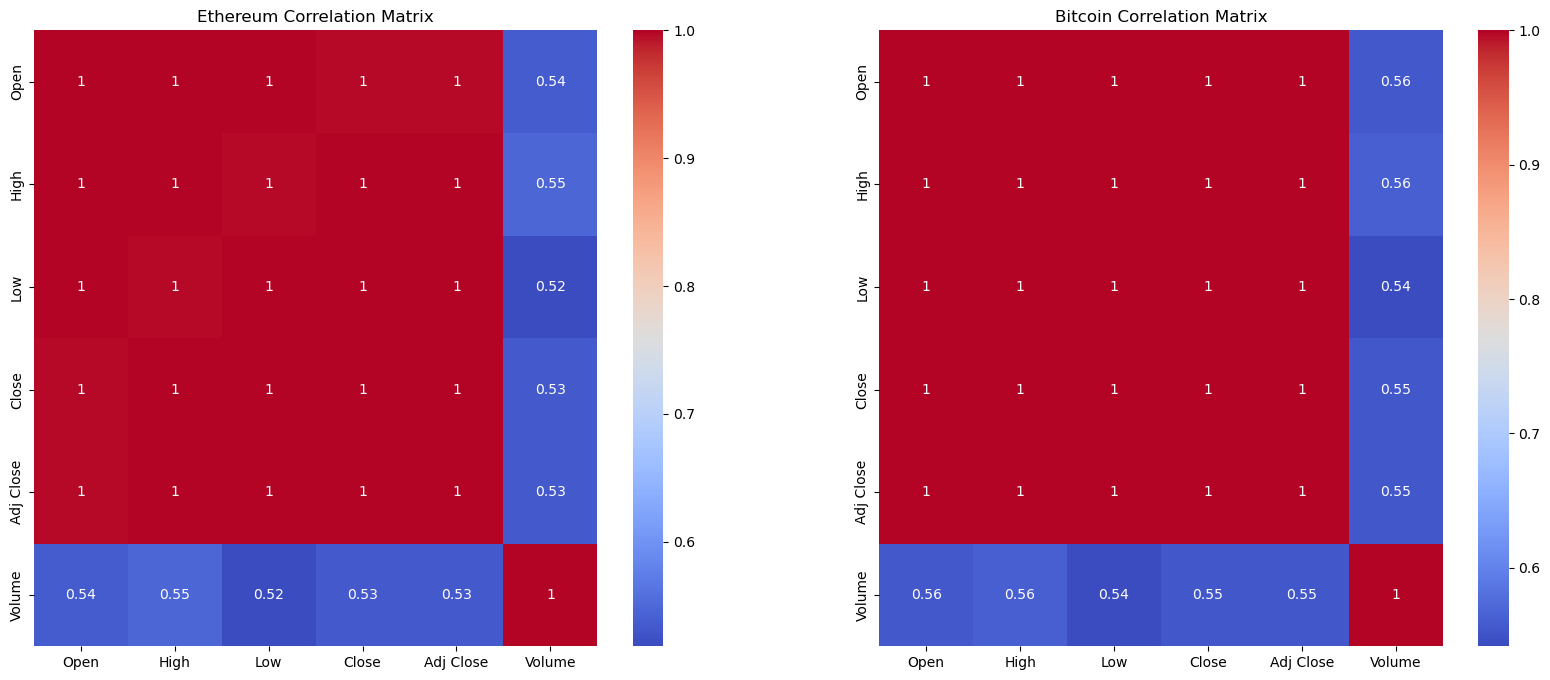

In [4]:
# Correlation matrices
eth_corr = eth_df.corr()
btc_corr = btc_df.corr()

# Visualize correlation matrices
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(eth_corr, annot=True, cmap='coolwarm', cbar=True, ax=ax[0])
ax[0].set_title('Ethereum Correlation Matrix')

sns.heatmap(btc_corr, annot=True, cmap='coolwarm', cbar=True, ax=ax[1])
ax[1].set_title('Bitcoin Correlation Matrix')

plt.show()


<Figure size 1400x700 with 0 Axes>

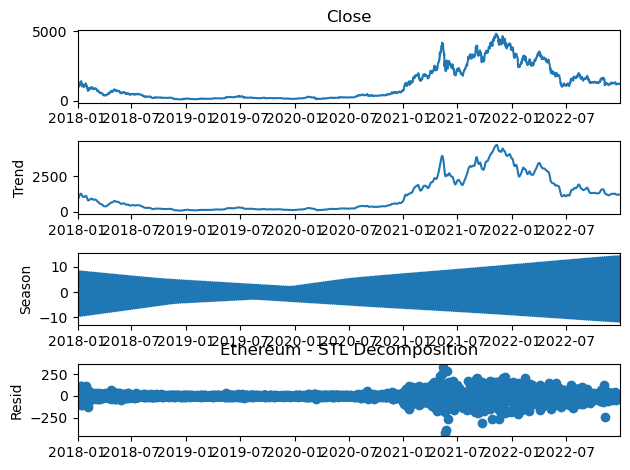

<Figure size 1400x700 with 0 Axes>

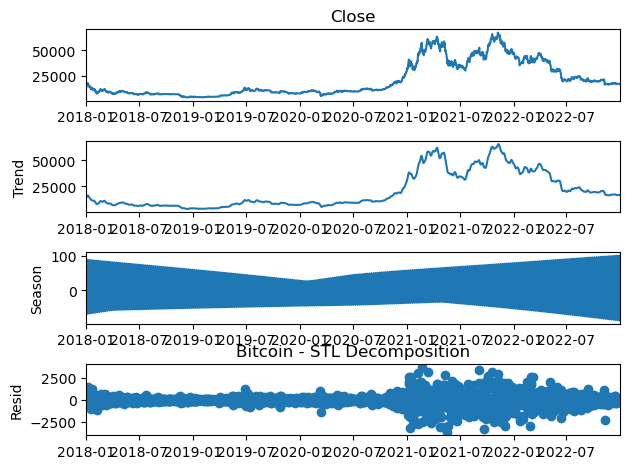

In [5]:
from statsmodels.tsa.seasonal import STL

# Decompose time series
eth_stl = STL(eth_df['Close'], seasonal=365)
eth_res = eth_stl.fit()

btc_stl = STL(btc_df['Close'], seasonal=365)
btc_res = btc_stl.fit()

# Plot decomposition for Ethereum
fig = plt.figure(figsize=(14, 7))
eth_res.plot()
plt.title('Ethereum - STL Decomposition')
plt.show()

# Plot decomposition for Bitcoin
fig = plt.figure(figsize=(14, 7))
btc_res.plot()
plt.title('Bitcoin - STL Decomposition')
plt.show()


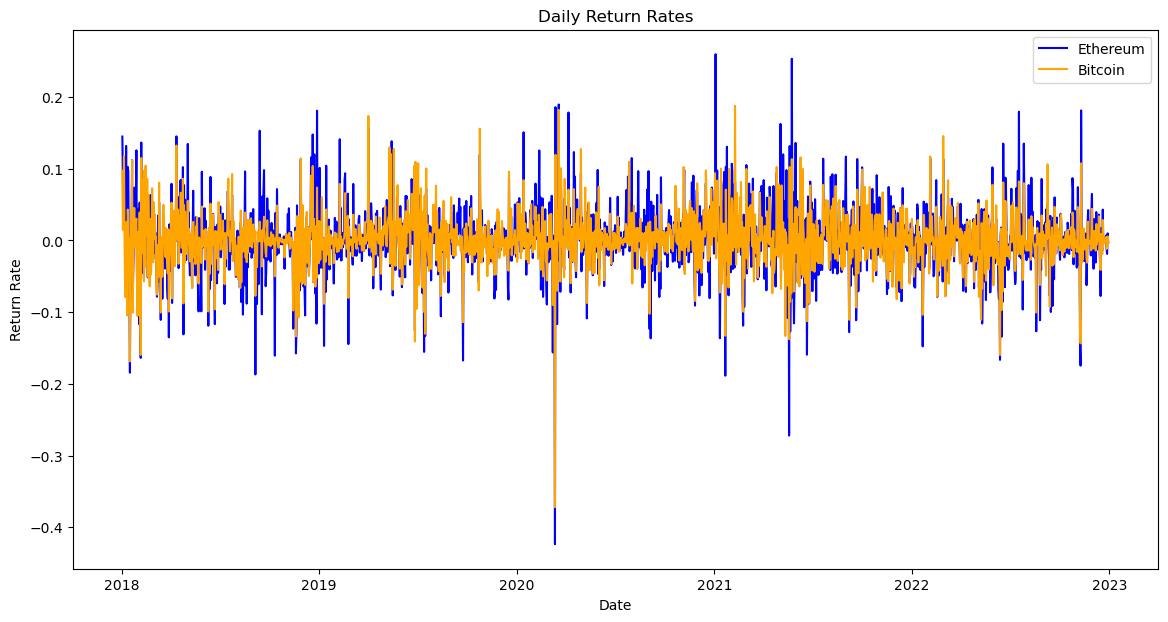

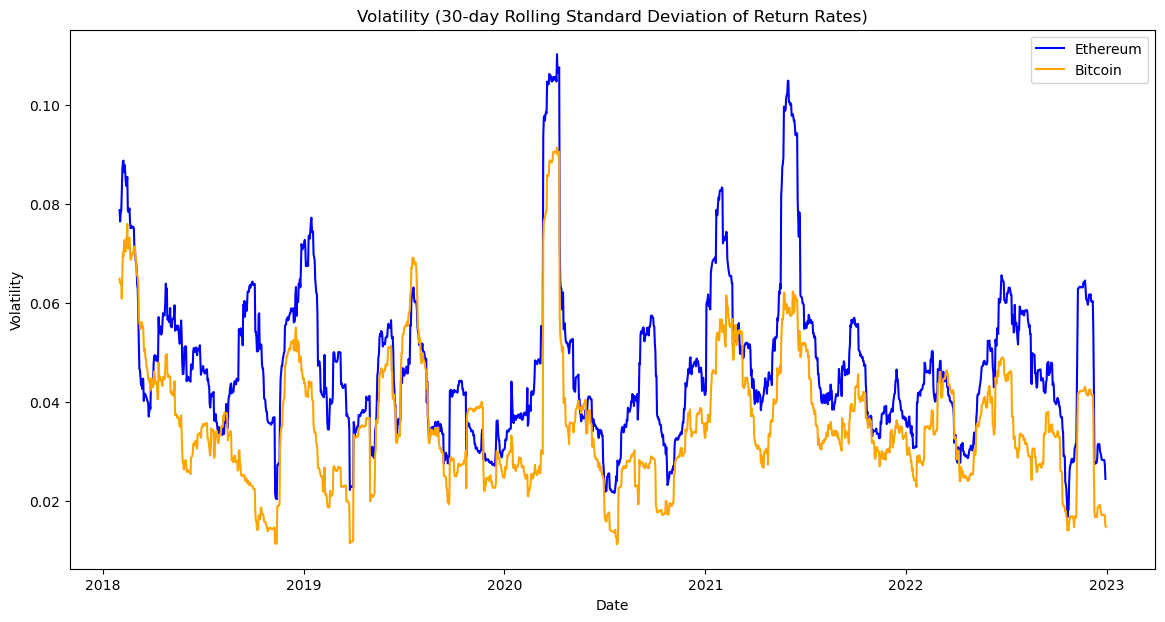

In [6]:
# Compute daily return rates
eth_df['Return'] = eth_df['Close'].pct_change()
btc_df['Return'] = btc_df['Close'].pct_change()

# Compute rolling standard deviation as a measure of volatility
window = 30  # 30-day window
eth_df['Volatility'] = eth_df['Return'].rolling(window).std()
btc_df['Volatility'] = btc_df['Return'].rolling(window).std()

# Plot return rates
plt.figure(figsize=(14, 7))
plt.plot(eth_df['Return'], label='Ethereum', color='blue')
plt.plot(btc_df['Return'], label='Bitcoin', color='orange')
plt.title('Daily Return Rates')
plt.xlabel('Date')
plt.ylabel('Return Rate')
plt.legend(loc='best')
plt.show()

# Plot volatility
plt.figure(figsize=(14, 7))
plt.plot(eth_df['Volatility'], label='Ethereum', color='blue')
plt.plot(btc_df['Volatility'], label='Bitcoin', color='orange')
plt.title('Volatility (30-day Rolling Standard Deviation of Return Rates)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend(loc='best')
plt.show()


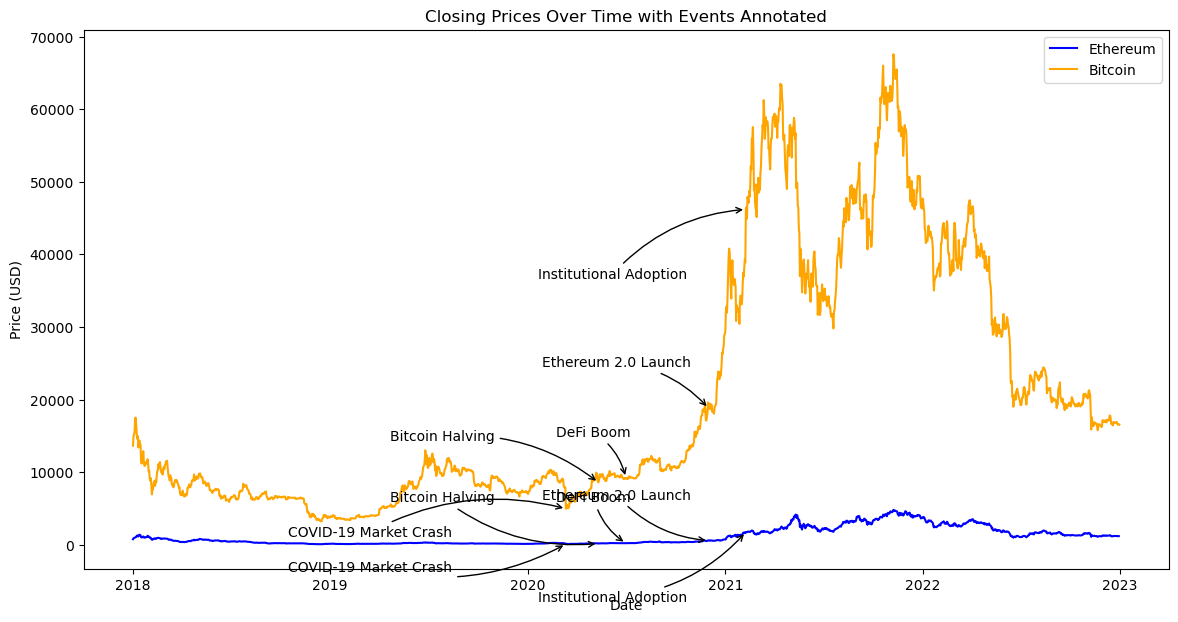

In [7]:
# Revised positions for annotations
event_positions = {
    'Bitcoin Halving': (-150, 30),
    'COVID-19 Market Crash': (-200, -20),
    'DeFi Boom': (-50, 30),
    'Institutional Adoption': (-150, -50),
    'Ethereum 2.0 Launch': (-120, 30)
}
event_dates = {
    'Bitcoin Halving': '2020-05-11',
    'COVID-19 Market Crash': '2020-03-12',
    'DeFi Boom': '2020-07-01',
    'Institutional Adoption': '2021-02-08',
    'Ethereum 2.0 Launch': '2020-12-01'
}

# Plot closing prices over time
plt.figure(figsize=(14,7))
plt.plot(eth_df['Close'], label='Ethereum', color='blue')
plt.plot(btc_df['Close'], label='Bitcoin', color='orange')

# Annotate events
for event, date in event_dates.items():
    if date in eth_df.index:
        plt.annotate(event, xy=(date, eth_df.loc[date, 'Close']), xytext=event_positions[event], textcoords='offset points',
                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))
    if date in btc_df.index:
        plt.annotate(event, xy=(date, btc_df.loc[date, 'Close']), xytext=event_positions[event], textcoords='offset points',
                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-.2'))

plt.title('Closing Prices Over Time with Events Annotated')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='best')
plt.show()


In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define the lookback period and initialize a MinMaxScaler
lookback = 60
scaler = MinMaxScaler(feature_range=(0, 1))

def create_dataset(df):
    '''
    Convert the dataframe into two numpy arrays X and y
    X is the input variables, y is the output variable
    '''
    data = df.values
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i, 0])  # predict the next Close price
    return np.array(X), np.array(y)

# Select the features we want to use
features = ['Close', 'Open', 'High', 'Low', 'Volume']
eth_df_feature = eth_df[features]

# Scale the features
eth_df_scaled = scaler.fit_transform(eth_df_feature.values)

# Create the dataset
X, y = create_dataset(eth_df_scaled)

# Split into training and testing datasets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

mse, mae, rmse


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
def create_dataset(data):
    '''
    Convert the data into two numpy arrays X and y
    X is the input variables, y is the output variable
    '''
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i, 0])  # predict the next Close price
    return np.array(X), np.array(y)

# Create the dataset
X, y = create_dataset(eth_df_scaled)

# Split into training and testing datasets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

mse, mae, rmse


ValueError: Found array with dim 3. Estimator expected <= 2.

In [ ]:
# Reshape the input data to 2D
X_train_2D = X_train.reshape(X_train.shape[0], -1)
X_test_2D = X_test.reshape(X_test.shape[0], -1)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_2D, y_train)

# Make predictions
y_pred = model.predict(X_test_2D)

# Compute error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

mse, mae, rmse


(0.0013561334890338863, 0.02576931639150491, 0.036825717766716864)

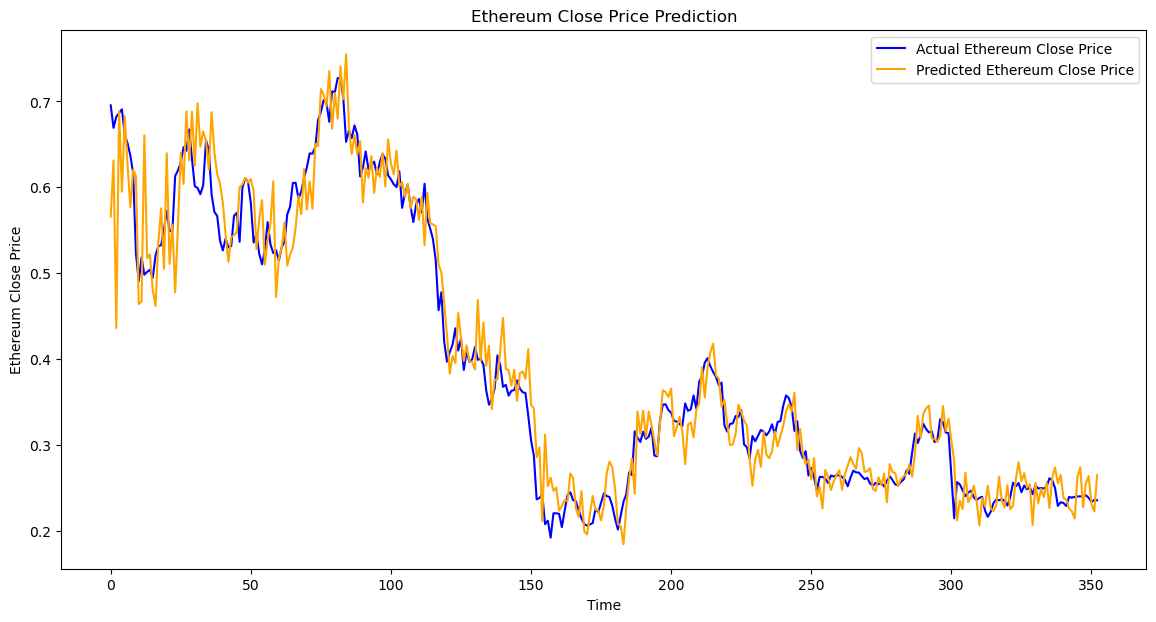

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(14,7))
plt.plot(y_test, color='blue', label='Actual Ethereum Close Price')
plt.plot(y_pred, color='orange', label='Predicted Ethereum Close Price')
plt.title('Ethereum Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Ethereum Close Price')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))


TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Reshape data to 2D
X_train_rf = X_train.reshape(X_train.shape[0], -1)
X_test_rf = X_test.reshape(X_test.shape[0], -1)

# Define the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train_rf, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test_rf)

# Compute error
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

mse_rf, mae_rf, rmse_rf


(0.0011432475101111957, 0.027679433700006896, 0.033811943305749166)

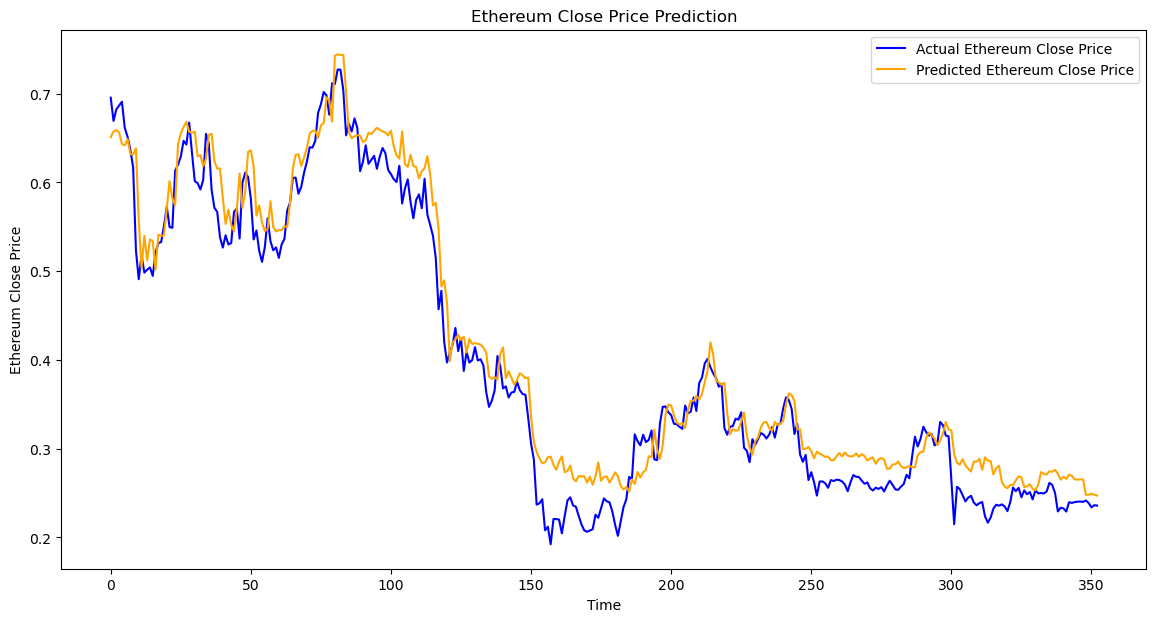

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(14,7))
plt.plot(y_test, color='blue', label='Actual Ethereum Close Price')
plt.plot(y_pred_rf, color='orange', label='Predicted Ethereum Close Price')
plt.title('Ethereum Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Ethereum Close Price')
plt.legend()
plt.show()


In [ ]:
from xgboost import XGBRegressor

# Define the XGBoost model
model_xgb = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
model_xgb.fit(X_train_rf, y_train)

# Make predictions
y_pred_xgb = model_xgb.predict(X_test_rf)

# Compute error
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

mse_xgb, mae_xgb, rmse_xgb


(0.002200034519351893, 0.039627399520488917, 0.04690452557431844)

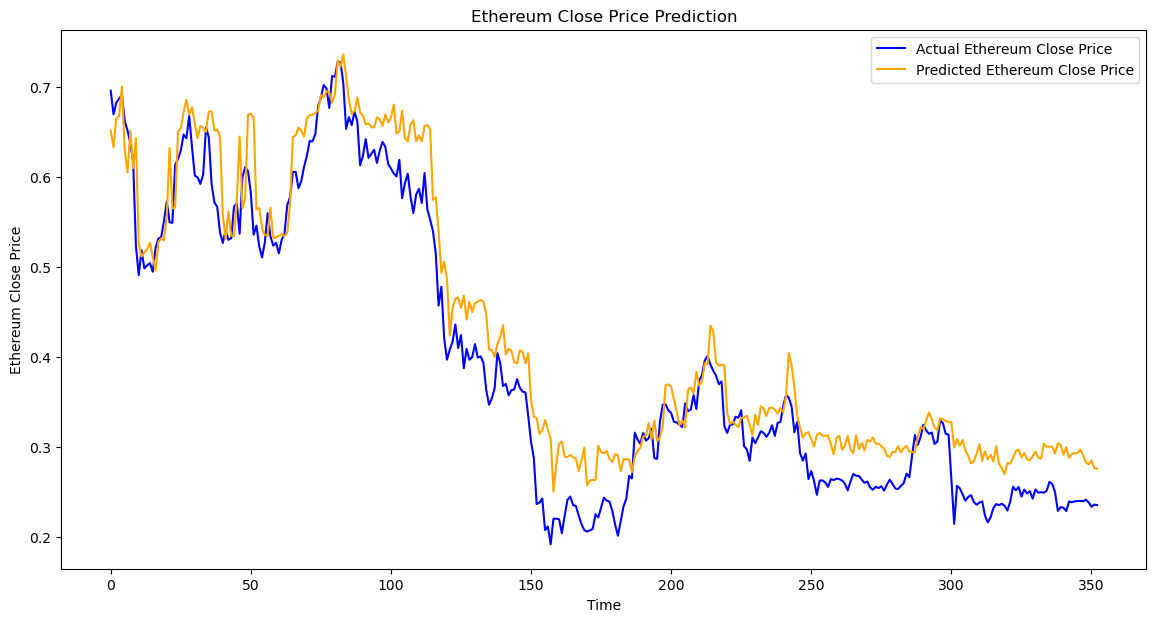

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(14,7))
plt.plot(y_test, color='blue', label='Actual Ethereum Close Price')
plt.plot(y_pred_xgb, color='orange', label='Predicted Ethereum Close Price')
plt.title('Ethereum Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Ethereum Close Price')
plt.legend()
plt.show()


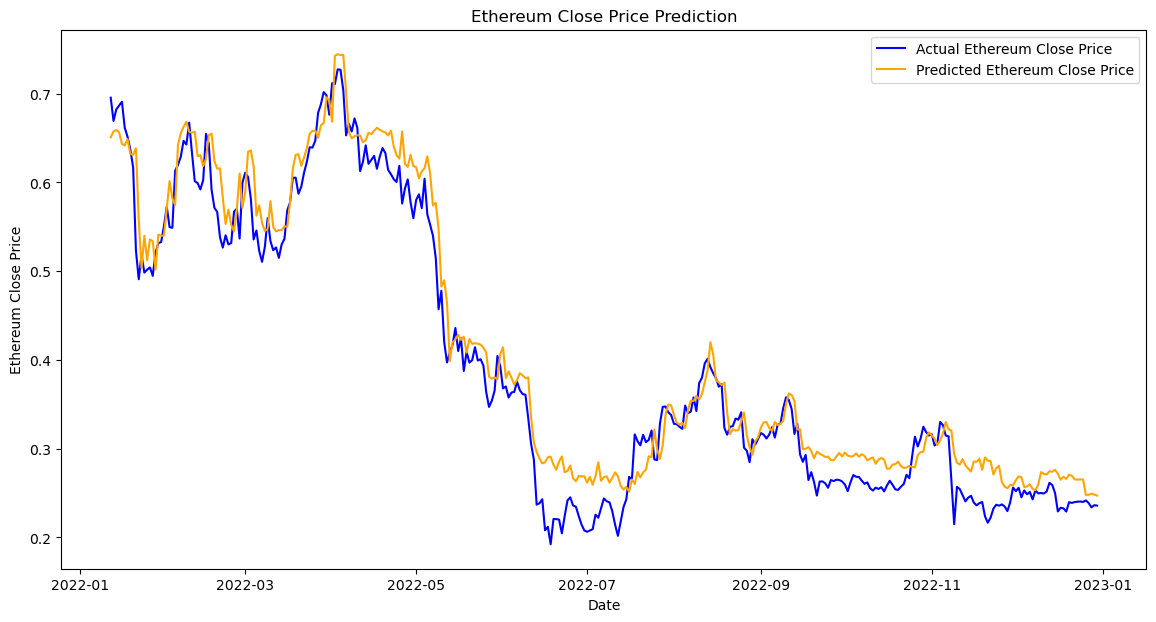

In [ ]:
# Get the dates for the testing data
test_dates = eth_df.index[-len(y_test):]

# Plot actual vs predicted values
plt.figure(figsize=(14,7))
plt.plot(test_dates, y_test, color='blue', label='Actual Ethereum Close Price')
plt.plot(test_dates, y_pred_rf, color='orange', label='Predicted Ethereum Close Price')
plt.title('Ethereum Close Price Prediction')
plt.xlabel('Date')
plt.ylabel('Ethereum Close Price')
plt.legend()
plt.show()


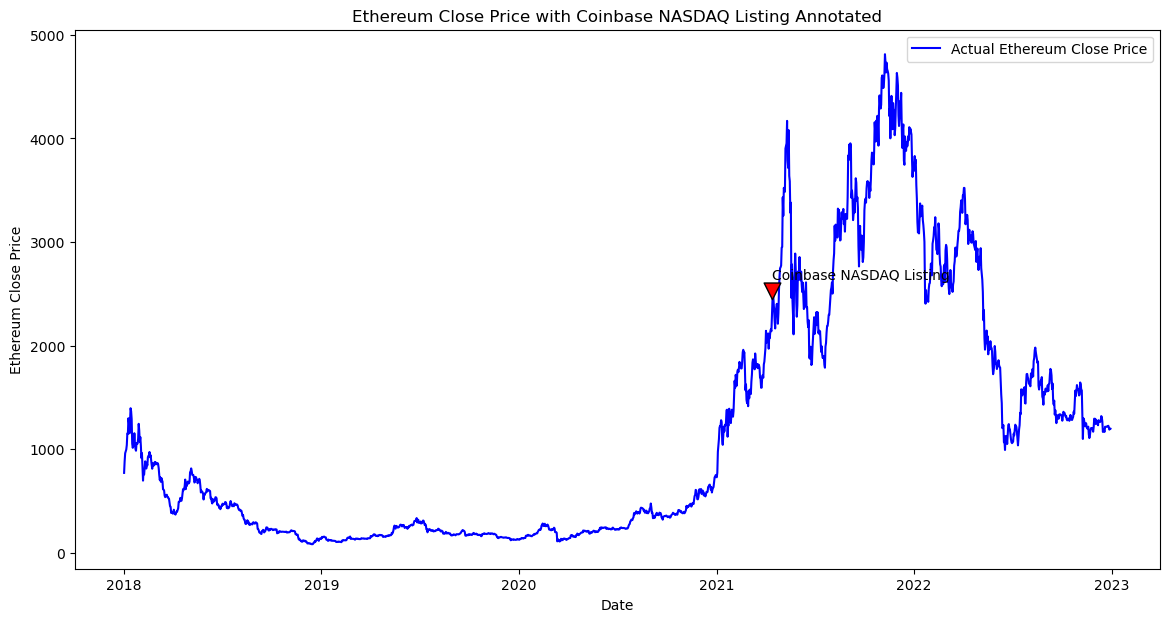

In [ ]:
# Load the data again
eth_df = pd.read_csv('ETH-USD.csv', index_col='Date', parse_dates=True)

# Coinbase's NASDAQ listing date
coinbase_listing_date = '2021-04-14'

# Check if the listing date is in our date range
if coinbase_listing_date in eth_df.index:
    # Plot actual Ethereum Close Price
    plt.figure(figsize=(14,7))
    plt.plot(eth_df.index, eth_df['Close'], color='blue', label='Actual Ethereum Close Price')

    # Annotate the Coinbase listing date
    plt.annotate('Coinbase NASDAQ Listing', 
                 xy=(coinbase_listing_date, eth_df.loc[coinbase_listing_date, 'Close']), 
                 xytext=(coinbase_listing_date, eth_df.loc[coinbase_listing_date, 'Close'] + 200),
                 arrowprops=dict(facecolor='red', shrink=0.05))

    plt.title('Ethereum Close Price with Coinbase NASDAQ Listing Annotated')
    plt.xlabel('Date')
    plt.ylabel('Ethereum Close Price')
    plt.legend()
    plt.show()
else:
    print(f"The Coinbase NASDAQ listing date ({coinbase_listing_date}) is not within the date range of the provided data.")
